These notebooks compare a base and scenario for Soundcast models. To run: from the menu bar above, choose **Cell -> Run All ** or run lines individually. Use the toggle button below to hide/show the raw Python code.

VMT, VHT, Delay, and Mode Share
----

### Define Inputs
-----

In [1]:
# Base run for comparison
base_run = r'R:\SoundCast\releases\TransportationFutures2010'

# Scenario names
base_name = '2010 Base'
scen_name = 'Scenario'

# Base Year for Validation data
base_yr = 2010

In [2]:
# Toggle to hide code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import os
import numpy as np
import pandas as pd
import h5py
import pylab as P
from IPython.display import display, display_pretty, Javascript, HTML
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
plt.style.use('ggplot')



# Change working directory; only run this once since its a relative path change
default_path = r'../../..'
os.chdir(default_path)



# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


----

In [4]:
# Read network summary from latest run
net_sum_scen = pd.read_excel(r'outputs\network_summary_detailed.xlsx', 
                        sheetname ='Network Summary')
net_sum_base = pd.read_excel(base_run + r'\outputs\network_summary_detailed.xlsx',
                            sheetname='Network Summary')



# delete first empty row
net_sum_scen.drop('tod', axis=0, inplace=True)
net_sum_base.drop('tod', axis=0, inplace=True)

# VMT

## VMT by TOD

In [5]:
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
# Sort TOD in coherent order
tod = {
    'am': 0,
    'md': 1,
    'pm': 2,
    'ev': 3,
    'ni': 4
}

In [7]:
# compare scenarios
vmt_scen = net_sum_scen.groupby('TP_4k').sum()
vmt_base = net_sum_base.groupby('TP_4k').sum()

# Select only VMT columns
vmt_scen = vmt_scen[vmt_scen.columns[[i.endswith('_vmt') for i in vmt_scen.columns]]]
vmt_base = vmt_base[vmt_base.columns[[i.endswith('_vmt') for i in vmt_base.columns]]]

In [8]:
df = pd.DataFrame([vmt_scen.sum(axis=1),
              vmt_base.sum(axis=1)]).T
df.columns=[scen_name,base_name]

# sort columns
df['tod_index'] = ([tod[x] for x in df.index])
df.sort_values('tod_index',inplace=True)
df.drop('tod_index',axis=1,inplace=True)
df.loc['Total'] = df.sum(axis=0)
df

,Scenario,2010 Base
TP_4k,,
am,"12,908,227","12,025,908"
md,"29,885,805","28,064,371"
pm,"17,902,477","17,572,611"
ev,"9,005,636","8,884,616"
ni,"14,125,808","13,212,746"
Total,"83,827,954","79,760,252"


**Total VMT by TOD**

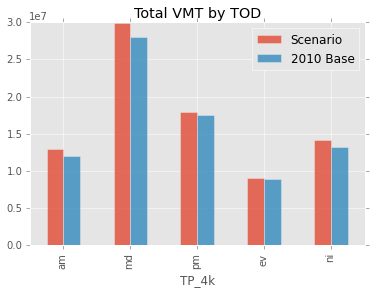

In [9]:
df.drop('Total',inplace=True)
df.plot(kind='bar', alpha=0.8,title='Total VMT by TOD')

** VMT Distribution by TOD**

In [10]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

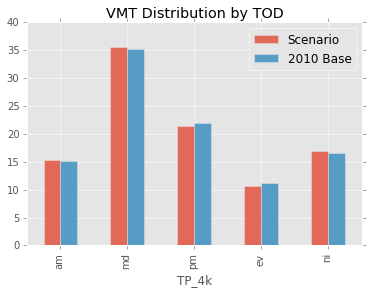

In [11]:
df.plot(kind='bar',alpha=0.8, title='VMT Distribution by TOD')

## VMT by Facility Type

In [12]:
pd.options.display.float_format = '{:,.0f}'.format

df = pd.DataFrame([vmt_scen.sum(axis=0),
              vmt_base.sum(axis=0)]).T
df.columns=[scen_name,base_name]
df.loc['Total'] = df.sum(axis=0)
# HTML(df.to_html(classes='right_aligned_df'))
df

,Scenario,2010 Base
arterial_vmt,"35,591,422","35,886,129"
connectors_vmt,"5,773,192","5,535,211"
highway_vmt,"42,463,340","38,338,912"
Total,"83,827,954","79,760,252"


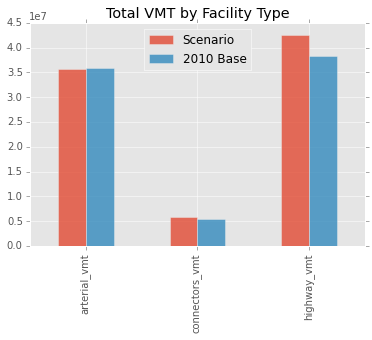

In [13]:
df.drop('Total',inplace=True)
df.plot(kind='bar',alpha=0.8,title='Total VMT by Facility Type')

** VMT Distribution by Facility Type**

In [14]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

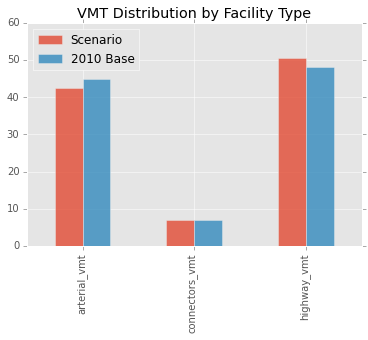

In [15]:
df.plot(kind='bar',alpha=0.8, title='VMT Distribution by Facility Type')

--------------

# Delay by TOD

In [16]:
# compare scenarios
vmt_scen = net_sum_scen.groupby('TP_4k').sum()
vmt_base = net_sum_base.groupby('TP_4k').sum()

# Select only VMT columns
vmt_scen = vmt_scen[vmt_scen.columns[[i.endswith('_delay') for i in vmt_scen.columns]]]
vmt_base = vmt_base[vmt_base.columns[[i.endswith('_delay') for i in vmt_base.columns]]]

In [17]:
# Sort TOD in coherent order
tod = {
    'am': 0,
    'md': 1,
    'pm': 2,
    'ev': 3,
    'ni': 4
}

In [18]:
pd.options.display.float_format = '{:,.0f}'.format

df = pd.DataFrame([vmt_scen.sum(axis=1),
              vmt_base.sum(axis=1)]).T
df.columns=[scen_name,base_name]

# sort columns
df['tod_index'] = ([tod[x] for x in df.index])
df.sort_values('tod_index',inplace=True)
df.drop('tod_index',axis=1,inplace=True)
df.loc['Total'] = df.sum(axis=0)
df

,Scenario,2010 Base
TP_4k,,
am,"136,776","72,648"
md,"330,894","164,023"
pm,"259,657","157,945"
ev,"95,714","59,289"
ni,"109,033","59,178"
Total,"932,074","513,084"


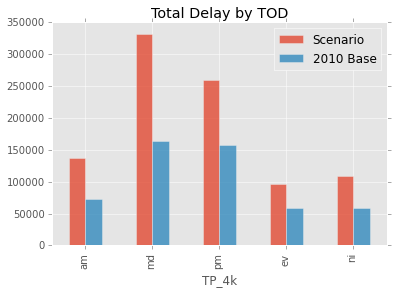

In [19]:
df.drop('Total',inplace=True)
df.plot(kind='bar', alpha=0.8,title='Total Delay by TOD')

**Delay Distribution by TOD**

In [20]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

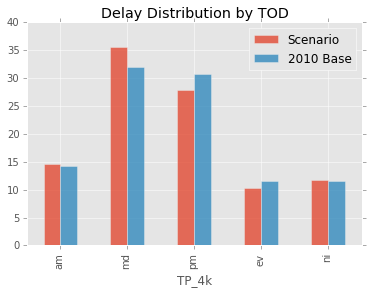

In [21]:
df.plot(kind='bar',alpha=0.8, title='Delay Distribution by TOD')

## Total Delay by Facility Type

In [22]:
pd.options.display.float_format = '{:,.0f}'.format

df = pd.DataFrame([vmt_scen.sum(axis=0),
              vmt_base.sum(axis=0)]).T
df.columns=[scen_name,base_name]
df.loc['Total'] = df.sum(axis=0)
df.drop('connectors_delay',inplace=True)
df

,Scenario,2010 Base
arterial_delay,"606,934","344,815"
highway_delay,"325,140","168,268"
Total,"932,074","513,084"


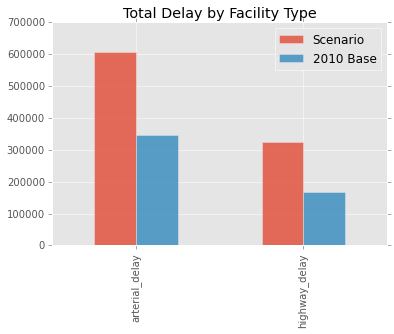

In [23]:
df.drop('Total',inplace=True)
df.plot(kind='bar',alpha=0.8,title='Total Delay by Facility Type')

**Delay Distribution by Facility Type**

In [24]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

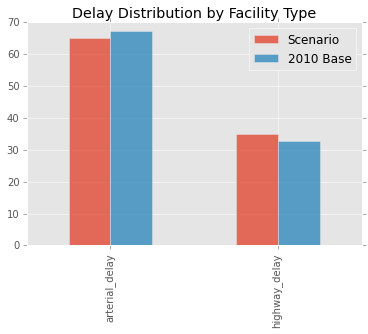

In [25]:
df.plot(kind='bar',alpha=0.8, title='Delay Distribution by Facility Type')

# Counts


In [26]:
def r_squared(actual, ideal):
    '''Calcualte R^2 between two data sets'''
    actual_mean = np.mean(actual)
    ideal_dev = np.sum([(val - actual_mean)**2 for val in ideal])
    actual_dev = np.sum([(val - actual_mean)**2 for val in actual])

    return ideal_dev / actual_dev

### Freeway Counts

In [27]:
net_sum_scen = pd.read_excel(r'outputs\network_summary_detailed.xlsx', 
                        sheetname ='TPTT Counts Output')

C:\Users\Brice\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


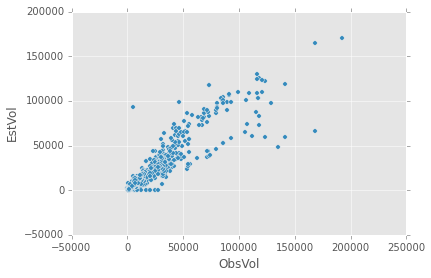

In [28]:
net_sum_scen[['ObsVol','EstVol']].plot(x='ObsVol', y='EstVol', kind='scatter')

### Arterial Counts

In [29]:
net_sum_scen = pd.read_excel(r'outputs\network_summary_detailed.xlsx', 
                        sheetname ='Arterial Counts Output')


                              R-squared: 0.71


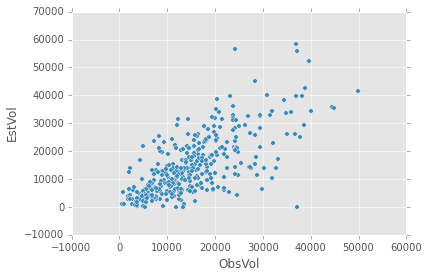

In [30]:
r_sq = r_squared(net_sum_scen['EstVol'],net_sum_scen['ObsVol'])
net_sum_scen[['ObsVol','EstVol']].plot(x='ObsVol', y='EstVol', kind='scatter')
print ""
print " "*30 + "R-squared: " + str(r_sq.round(2))

# Screenline Volumes

In [31]:
net_sum_scen = pd.read_excel(r'outputs\network_summary_detailed.xlsx', 
                        sheetname ='Screenline Volumes')

In [32]:
# Load screenline volumes
screenlines = pd.read_csv(r'scripts/summarize/inputs/screenlines.csv')

In [33]:
df = net_sum_scen.merge(screenlines,left_on='Screenline', right_on='id')
primary_df = df[df['type'] == 'primary']
primary_df = primary_df.groupby('name').sum()

secondary_df = df[df['type'] == 'secondary']
secondary_df = secondary_df.groupby('name').sum()

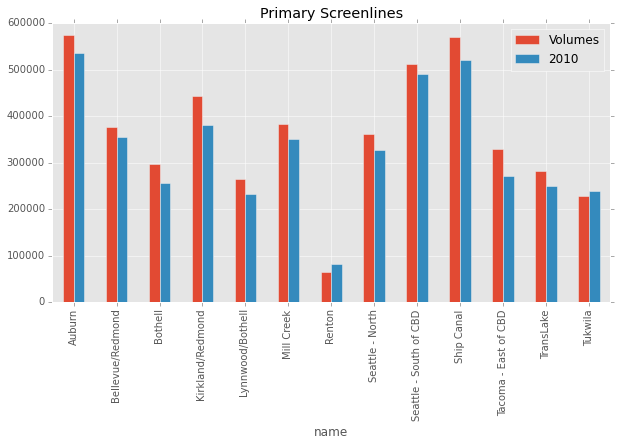

In [34]:
ax = primary_df[['Volumes',str(base_yr)]].plot(kind='bar', figsize=(10,5), title='Primary Screenlines')

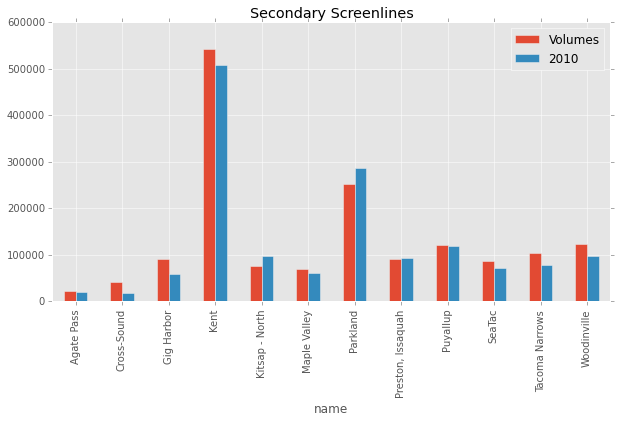

In [35]:
ax = secondary_df[['Volumes',str(base_yr)]].plot(kind='bar', figsize=(10,5), 
                                                          title='Secondary Screenlines')

In [36]:
df = df.groupby('name').sum()


                              R-squared: 0.88


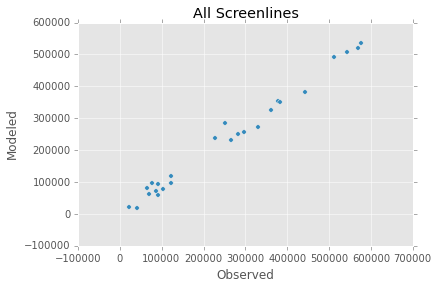

In [37]:
r_sq = r_squared(df['Volumes'],df[str(base_yr)])
ax = df[['Volumes',str(base_yr)]].plot(x='Volumes', y=str(base_yr), kind='scatter', title='All Screenlines')
ax.set_xlabel('Observed'); ax.set_ylabel('Modeled')
print ""
print " "*30 + "R-squared: " + str(r_sq.round(2))

# Transit

In [38]:
net_sum_scen = pd.read_excel(r'outputs\network_summary_detailed.xlsx', 
                        sheetname ='Transit Summaries')
net_sum_base = pd.read_excel(base_run + r'\outputs\network_summary_detailed.xlsx',
                            sheetname='Transit Summaries')

net_sum_scen.drop('id',axis=0, inplace=True)
net_sum_base.drop('id',axis=0, inplace=True)

net_sum_scen['id'] = net_sum_scen.index
net_sum_base['id'] = net_sum_base.index



In [39]:
pd.options.display.float_format = '{:,.0f}'.format

In [40]:
# Look up transit codes
am_routes = pd.read_excel(r'scripts/summarize/inputs/network_summary/TransitRouteKey.xlsx', sheet='AM')
md_routes = pd.read_excel(r'scripts/summarize/inputs/network_summary/TransitRouteKey.xlsx', sheet='MD')

In [42]:
# Insert full name labels for transit providers
agency_names = {
    'CR': 'Commuter Rail',
    'CT': 'Community Transit',
    'ET': 'Everett Transit',
    'KT': 'Kitsap Transit',
    'LR': 'Link Light Rail',
    'MK': 'King County Metro',
    'PT': 'Pierce Transit',
    'SC': 'Monorail',
    'ST': 'Sound Transit Express',
    'WF': 'WA Ferries'
}

for time_period in [am_routes, md_routes]:
    time_period['Provider'] = [agency_names[time_period['Agency'].iloc[i]] for i in xrange(len(time_period))]

In [43]:
def transit_by_tod(tod_list):
    cols = []
    for time_period in tod_list:
        cols.append(time_period + '_time')
        cols.append(time_period + '_board')
    return cols

In [44]:
# seperate model results into time periods
am_hours = ['6to7','7to8','8to9']
md_hours = ['10to14','14to15']

am_model = net_sum_scen[transit_by_tod(am_hours)+['id']]
md_model = net_sum_scen[transit_by_tod(md_hours)+['id']]

In [48]:
am_routes

,id,LineID,TimePeriod,TransLineNo,Mode,Description,Operator,RouteNumber,RDCode,Agency,Provider
0,1,110001,1,MK001a,b,MK001a,1,MK001,1001,MK,King County Metro
1,2,110002,1,MK001b,b,MK001b,1,MK001,1001,MK,King County Metro
2,3,110003,1,MK002a,b,MK002a,1,MK002,1002,MK,King County Metro
3,4,110004,1,MK002b,b,MK002b,1,MK002,1002,MK,King County Metro
4,5,110005,1,MK002c,b,MK002c,1,MK002,1002,MK,King County Metro
5,6,110006,1,MK002d,b,MK002d,1,MK002,1002,MK,King County Metro
6,7,110007,1,MK002e,b,MK002e,1,MK002,1002,MK,King County Metro
7,8,110008,1,MK002f,b,MK002f,1,MK002,1002,MK,King County Metro
8,9,110009,1,MK003a,b,MK003a,1,MK003,1003,MK,King County Metro
9,10,110010,1,MK003b,b,MK003b,1,MK003,1003,MK,King County Metro


In [54]:
am_model['id'] = am_model['id'].astype('int')
md_model['id'] = md_model['id'].astype('int')

C:\Users\Brice\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [55]:
# Join route lookups
am_model = am_model.merge(am_routes, left_on='id', right_on='id')
md_model = md_model.merge(md_routes, left_on='id', right_on='id')

In [57]:
# Sum boardings for aggregrate time period (e.g., AM, MD, PM...)
am_model['Boardings'] = am_model[[str(hr) + '_board' for hr in am_hours]].sum(axis=1)
md_model['Boardings'] = md_model[[str(hr) + '_board' for hr in md_hours]].sum(axis=1)

In [61]:
am_model

,6to7_time,6to7_board,7to8_time,7to8_board,8to9_time,8to9_board,id,LineID,TimePeriod,TransLineNo,Mode,Description,Operator,RouteNumber,RDCode,Agency,Provider,Boardings
0,22,72,23,104,23,89,1,110001,1,MK001a,b,MK001a,1,MK001,1001,MK,King County Metro,265
1,19,63,19,80,19,60,2,110002,1,MK001b,b,MK001b,1,MK001,1001,MK,King County Metro,203
2,22,65,22,90,22,65,3,110003,1,MK002a,b,MK002a,1,MK002,1002,MK,King County Metro,220
3,29,28,30,38,29,28,4,110004,1,MK002b,b,MK002b,1,MK002,1002,MK,King County Metro,95
4,18,50,18,58,18,47,5,110005,1,MK002c,b,MK002c,1,MK002,1002,MK,King County Metro,155
5,23,95,23,122,23,88,6,110006,1,MK002d,b,MK002d,1,MK002,1002,MK,King County Metro,306
6,21,29,21,34,21,33,7,110007,1,MK002e,b,MK002e,1,MK002,1002,MK,King County Metro,96
7,22,112,22,145,22,107,8,110008,1,MK002f,b,MK002f,1,MK002,1002,MK,King County Metro,363
8,27,18,28,19,27,15,9,110009,1,MK003a,b,MK003a,1,MK003,1003,MK,King County Metro,52
9,18,15,19,15,19,17,10,110010,1,MK003b,b,MK003b,1,MK003,1003,MK,King County Metro,47


In [58]:
am_model.groupby('Provider').sum()['Boardings']

Provider
Community Transit       10,433
Commuter Rail            5,130
Everett Transit          1,260
King County Metro       72,062
Kitsap Transit           2,153
Link Light Rail          3,683
Monorail                    85
Pierce Transit          12,001
Sound Transit Express   12,073
WA Ferries                 566
Name: Boardings, dtype: float64

In [59]:
md_model.groupby('Provider').sum()['Boardings']

Provider
Community Transit        12,609
Commuter Rail                 0
Everett Transit               0
King County Metro       116,088
Kitsap Transit                0
Link Light Rail               0
Monorail                      0
Pierce Transit              140
Sound Transit Express     5,790
WA Ferries                    0
Name: Boardings, dtype: float64

In [ ]:
am_model